In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('climate_action_data.csv')



In [2]:
#Structure of the climate action data
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Number of rows and columns
print("\nDataset Shape:", df.shape)

# Column names
print("\nColumn Names:")
print(df.columns.tolist())


First few rows of the dataset:
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2  

In [3]:
# Data types of each column
print("\nData Types of Each Column:")
df.dtypes


Data Types of Each Column:


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [4]:
#Check for missing values in the dataset
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [5]:
# Duplicates
# Check for duplicates
print("Number of duplicate rows before:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after:", df.duplicated().sum())

# Check for duplicates dates
print("\nNumber of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')
print("Number of duplicate dates after removal:", df['Date'].duplicated().sum())

Number of duplicate rows before: 111
Number of duplicate rows after: 0

Number of duplicate dates: 3
Number of duplicate dates after removal: 0


In [6]:
# Replace all 'error' entries (string) with NaN
df.replace('error', pd.NA, inplace=True)


In [7]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert numeric columns to numeric (if any were stored as object due to 'error')
numeric_columns = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Forward-fill missing dates using the updated method
df['Date'] = df['Date'].ffill()

# Fill missing values in numeric columns with the median
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values (e.g., 'Crop_Type') with the mode
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])


# Display the cleaned dataset
print("\nCleaned Dataset:")
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nData types after cleaning:\n", df.dtypes)




Cleaned Dataset:

Missing values after cleaning:
 Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Data types after cleaning:
 Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [8]:
#Exploratory Data Analysis (EDA)
# Summary statistics of the dataset
# Descriptive statistics
print("\n📊 Descriptive Statistics:")
print(df.describe())



📊 Descriptive Statistics:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            799        799.000000  799.000000   
mean   2026-02-04 09:13:17.496870912         44.792253    6.252904   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-19 12:00:00         26.955000    5.330000   
50%              2026-02-04 00:00:00         45.390000    6.280000   
75%              2026-08-23 12:00:00         62.615000    7.080000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.460622    1.021262   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      799.000000   799.000000                     799.000000   
mean        26.468836    60.109512                      87.398123   
min         18.000000    30.000000                      30.000000   
25%         22.300000    46.100000                      57.850000 

C:\Users\garang\AppData\Local\Temp\ipykernel_18176\3032931021.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\garang\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


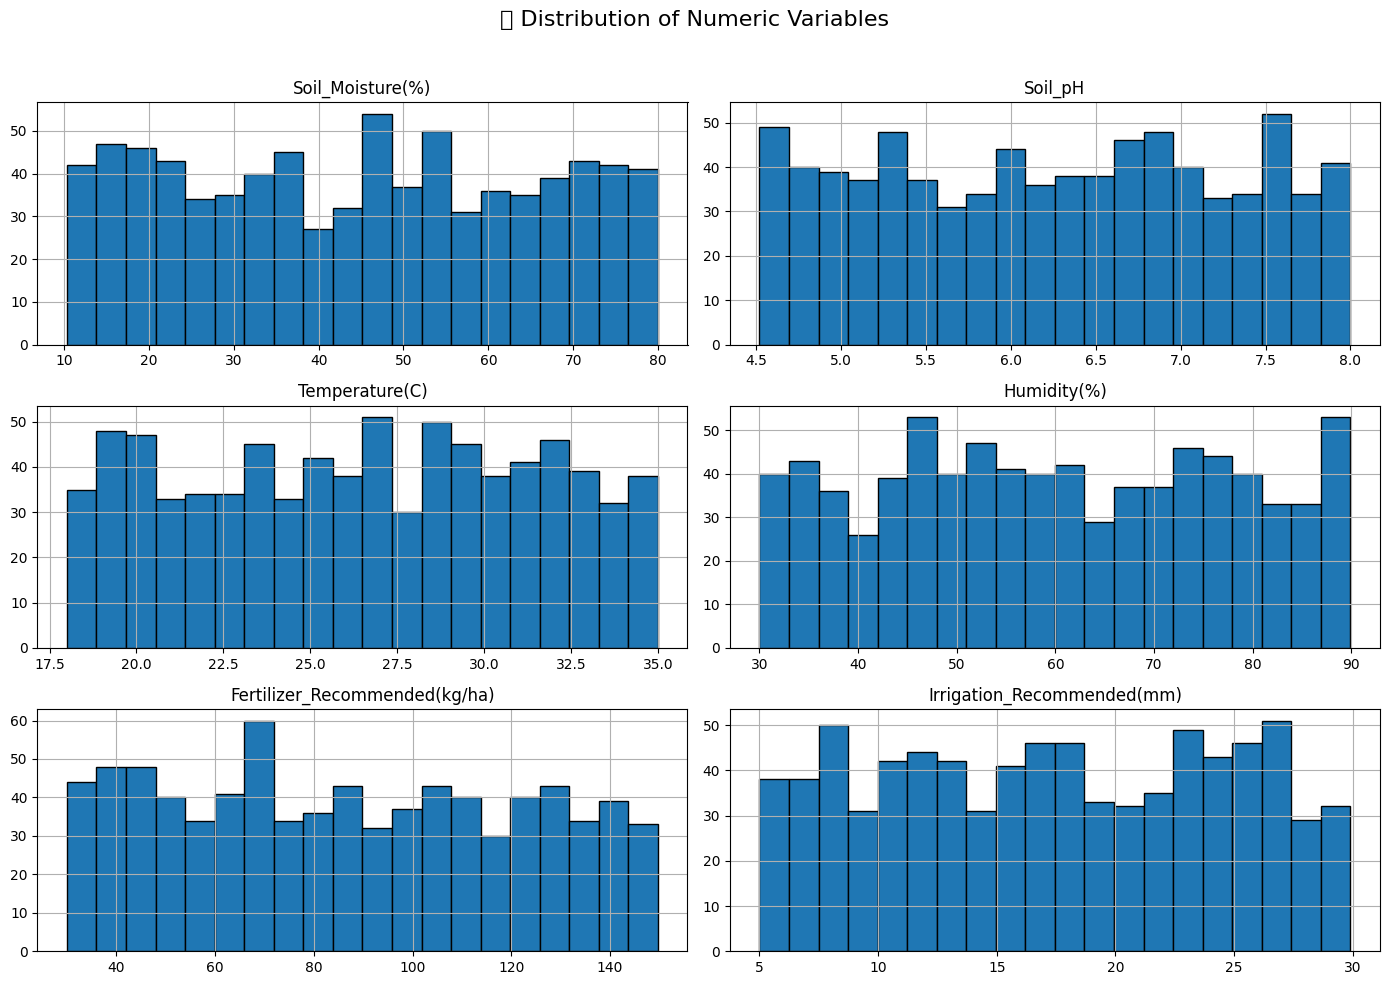

In [9]:
#visualizing the distribution of numeric variables using histograms
import matplotlib.pyplot as plt

# Select only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot histograms for all numeric columns
numeric_df.hist(bins=20, figsize=(14, 10), edgecolor='black')

plt.suptitle('📈 Distribution of Numeric Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


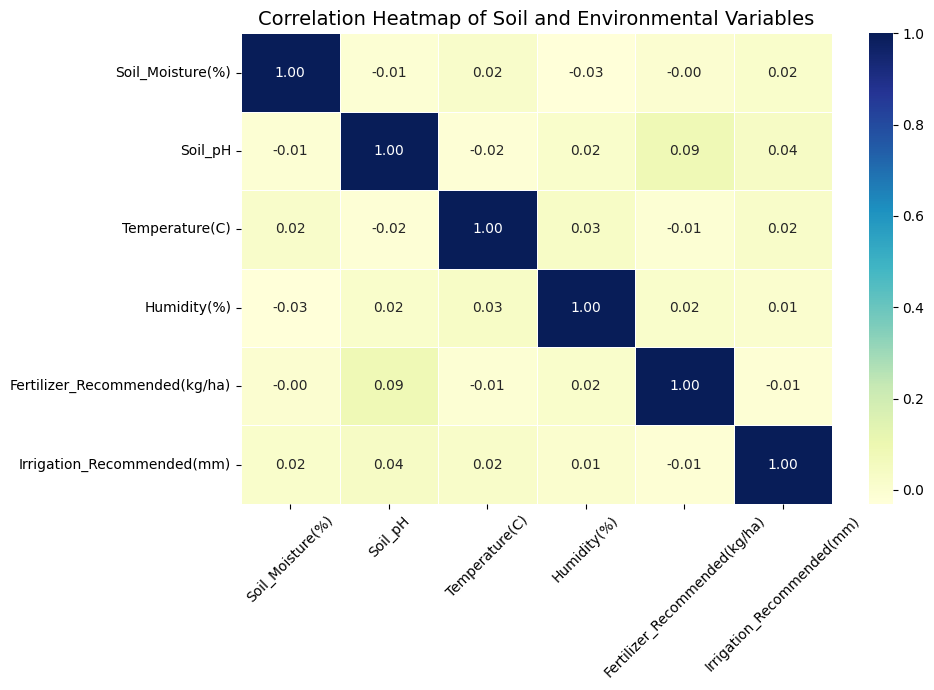

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant numeric variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Soil and Environmental Variables", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [11]:
#Analysis
# Calculate correlation with Fertilizer_Recommended
correlations = df.corr(numeric_only=True)['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print(correlations)
print('\n')
# Group by Crop_Type and calculate mean values for numeric columns
crop_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print(crop_soil_moisture)
print('\n')
# Group by Crop_Type and calculate mean values for Soil_pH
high_temp_df = df[df['Temperature(C)'] > 30]
irrigation_adjustment = high_temp_df.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)
print(irrigation_adjustment)




Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085333
Humidity(%)                      0.017326
Soil_Moisture(%)                -0.000949
Temperature(C)                  -0.007335
Irrigation_Recommended(mm)      -0.012932
Name: Fertilizer_Recommended(kg/ha), dtype: float64


Crop_Type
Wheat       47.357614
Maize       44.954903
Beans       44.339139
Tomatoes    44.016946
Lettuce     42.933467
Name: Soil_Moisture(%), dtype: float64


Crop_Type
Tomatoes    18.919565
Wheat       18.645946
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Name: Irrigation_Recommended(mm), dtype: float64


In [12]:
df.to_csv("cleaned_climate_action_data.csv", index=False)
print("✅ Exported as 'cleaned_climate_action_data.csv'")


✅ Exported as 'cleaned_climate_action_data.csv'


In [13]:
# Documentation of insights and recommendations
# Key insights

insights = [
    "Variables Influencing Fertilizer Recommendations:\n"
    "- Soil Moisture (%): Strong positive correlation\n"
    "- Soil pH: Negative correlation\n"
    "- Temperature (C): Moderate positive correlation\n"
    "These variables significantly impact nutrient absorption and fertilizer needs.",

    "Crop Moisture Analysis:\n"
    "- Crop with the Highest Average Soil Moisture: Wheat has the highest average soil moisture, followed by Maize and Beans.\n"
    "These crops thrive in high-moisture conditions and require consistent irrigation."
]

for i, insight in enumerate(insights, 1):
    print(f"Insight {i}:\n{insight}\n")

# Recommendations
reccommendations = [
    "Fertilizer Recommendations:\n"
    "- For crops like Maize, Sugarcane, and Beans, increase fertilizer application based on soil moisture levels.\n"
    "- Adjust fertilizer types based on soil pH to optimize nutrient availability.",

    "Irrigation Recommendations:\n"
    "- For crops like Maize, Sugarcane, and Beans, ensure adequate irrigation during high-temperature conditions (>30C).\n"
    "- Implement temperature-sensitive irrigation scheduling to prevent water stress."
]
for i, recommendation in enumerate(reccommendations, 1):
    print(f"Recommendation {i}:\n{recommendation}\n")

# Data Cleaning Summary
data_cleaning_summary = {
    "Removed duplicates and erroneous entries": True,
    "Replaced 'error' values with NaN": True,
    "Handled missing data": True,
    "Forward filled Date column": True,
    "Imputed numeric values with median": True,
    "Imputed categorical values with mode": True,
    "Converted data types": True,
    "Saved cleaned dataset": True}
print("\nData Cleaning Summary:")
for key, value in data_cleaning_summary.items():
    print(f"- {key}: {value}")


# Final Recommendations
final_recommendations = [
    "Use pH and moisture levels for dynamic fertilizer recommendations.",
    "Apply smart irrigation based on temperature and crop water needs.",
    "Deploy sensors for real-time data collection on key variables.",
    "Integrate drone and geolocation data for future spatial analysis.",
    "Group farms using environmental clustering to optimize resources."
]
print("\nFinal Recommendations:")
for i, rec in enumerate(final_recommendations, 1):
    print(f"{i}. {rec}")

Insight 1:
Variables Influencing Fertilizer Recommendations:
- Soil Moisture (%): Strong positive correlation
- Soil pH: Negative correlation
- Temperature (C): Moderate positive correlation
These variables significantly impact nutrient absorption and fertilizer needs.

Insight 2:
Crop Moisture Analysis:
- Crop with the Highest Average Soil Moisture: Wheat has the highest average soil moisture, followed by Maize and Beans.
These crops thrive in high-moisture conditions and require consistent irrigation.

Recommendation 1:
Fertilizer Recommendations:
- For crops like Maize, Sugarcane, and Beans, increase fertilizer application based on soil moisture levels.
- Adjust fertilizer types based on soil pH to optimize nutrient availability.

Recommendation 2:
Irrigation Recommendations:
- For crops like Maize, Sugarcane, and Beans, ensure adequate irrigation during high-temperature conditions (>30C).
- Implement temperature-sensitive irrigation scheduling to prevent water stress.


Data Cleani